In [115]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [116]:
df=pd.read_csv(r"C:\Users\madhu\Downloads\Housing.csv")

In [117]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [118]:
df=df.iloc[:,:-1]

In [119]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [120]:
df.shape

(545, 12)

In [121]:
target_column="price"

In [122]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [123]:
df[df.duplicated()]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea


In [124]:
df.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
dtype: int64

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

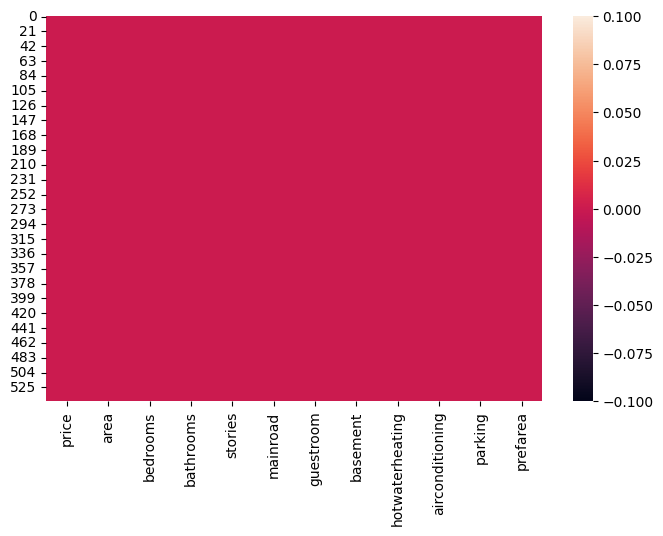

In [126]:
plt.figure(figsize=[8,5])
sns.heatmap(data=(df.isnull()))
plt.show()

Observation : NO null value present in dataset

In [127]:
# check statistical analysis for numerical columns
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4766729.25,1870439.62,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5150.54,2170.14,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.97,0.74,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.29,0.50,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.81,0.87,1.0,1.0,2.0,2.0,4.0
parking,545.0,0.69,0.86,0.0,0.0,0.0,1.0,3.0


Observation : Max price of house depends on max area 

In [128]:
#statisstical analysis of categorical columns
df.describe(include="object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
count,545,545,545,545,545,545
unique,2,2,2,2,2,2
top,yes,no,no,no,no,no
freq,468,448,354,520,373,417


Observation : No has most frequency

In [129]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    int64 
 11  prefarea         545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [130]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [131]:
df.columns.value_counts()

price              1
area               1
bedrooms           1
bathrooms          1
stories            1
mainroad           1
guestroom          1
basement           1
hotwaterheating    1
airconditioning    1
parking            1
prefarea           1
Name: count, dtype: int64

In [132]:
#lets plot count plot for all categorical column
cat_columns=df.select_dtypes(include=['object']).columns
cat_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [133]:
num_columns=df.select_dtypes(exclude="object").columns
num_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

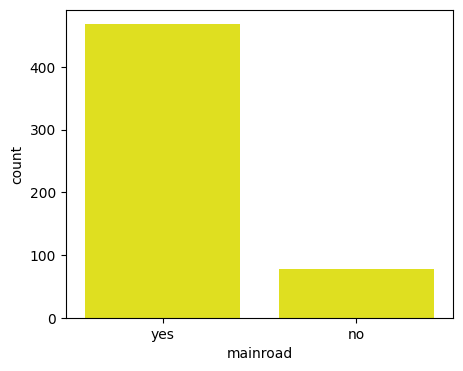

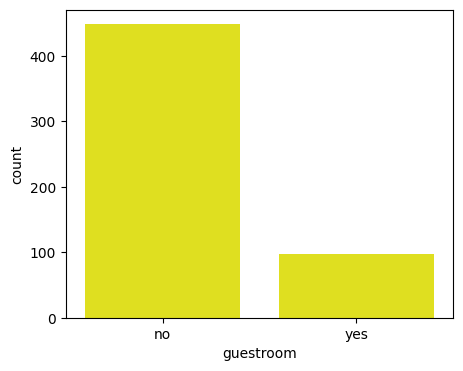

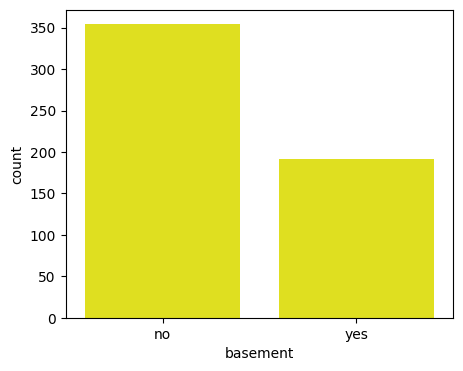

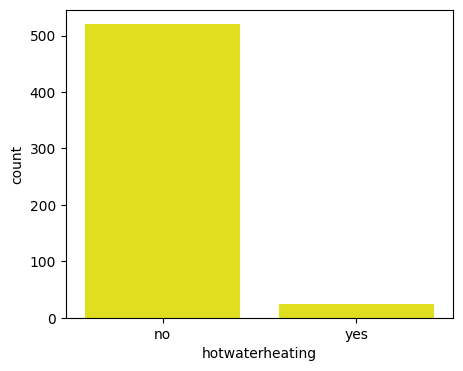

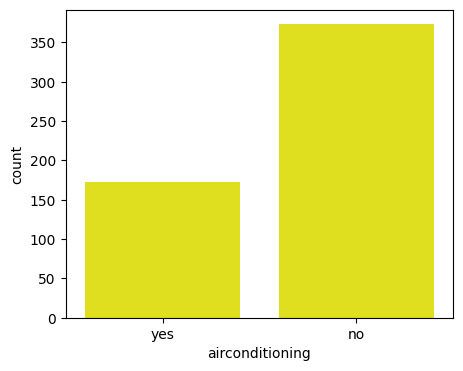

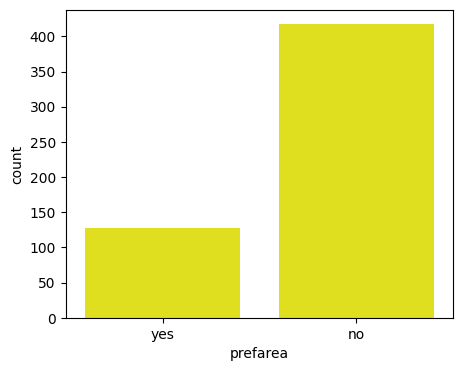

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in cat_columns:
    c = df[i].value_counts()
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=i, color="yellow")
    plt.show()


Observation : We can see here only mianraod column has more Yes value rest of all has more No value


In [135]:
#check skewed ness of num_columns
df[num_columns].skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

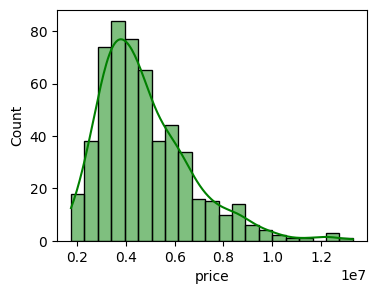

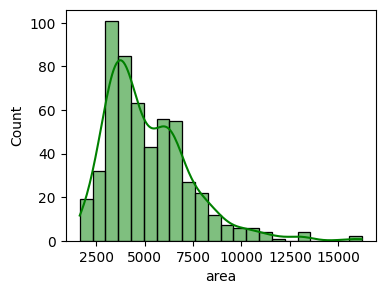

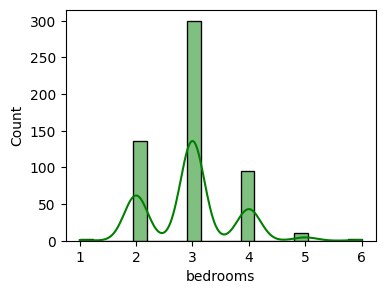

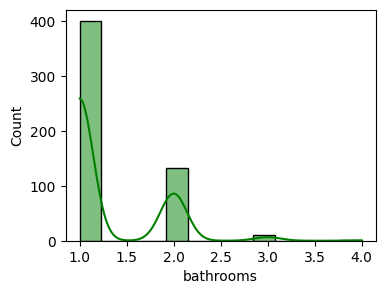

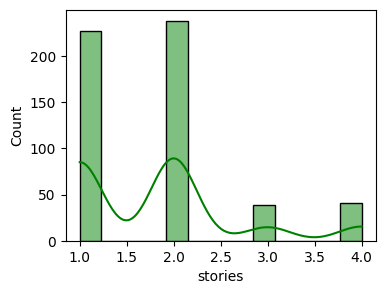

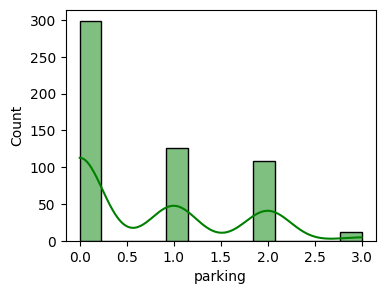

In [136]:
#plot dist plot for every num_columns

for j in num_columns:
    plt.figure(figsize=[4,3])
    sns.histplot(df,x=j,color="green",kde=True)
    plt.show()

Observation : There is some outliers in area,price and bathrooms

In [137]:
from scipy.stats import zscore

z_score=abs(df[num_columns].apply(zscore))
threshold=3
outliers=(z_score > threshold).any(axis=1)
new_df=df[~outliers]

In [138]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes


In [139]:
new_df.shape

(522, 12)

In [140]:
new_df[num_columns].skew()

price        0.801228
area         0.844266
bedrooms     0.298626
bathrooms    1.187898
stories      1.089925
parking      0.900962
dtype: float64

In [141]:
df[num_columns].skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

Observation : Now we have handled some outliers

In [142]:
num_columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [143]:
cat_columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [144]:
mainroad_cat=["yes","no"]
guestroom_cat=["yes",'no']
basement_cat=["yes",'no']
hotwaterheating_cat=["yes",'no']
airconditioning_cat=["yes",'no']
prefarea_cat=["yes",'no']

In [145]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [146]:
num_pipeline=Pipeline(
    steps=[("imputer",SimpleImputer()),
           ("scaler",StandardScaler())]
)

In [147]:
cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OrdinalEncoder(categories=[mainroad_cat,guestroom_cat,basement_cat,hotwaterheating_cat,airconditioning_cat,prefarea_cat]))]
)

In [148]:
preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,num_columns),
        ("cat_pipeline",cat_pipeline,cat_columns)
    ]
)

In [149]:
X=new_df.drop(labels="price",axis=1)
y=new_df[['price']]

In [150]:
X.shape

(522, 11)

In [151]:
y.shape

(522, 1)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

In [154]:
X_train.shape

(365, 11)

In [155]:
y_train.shape

(365, 1)

In [156]:
X_test.shape

(157, 11)

In [157]:
y_test.shape

(157, 1)

In [158]:
train_data=preprocessor.fit_transform(X_train)
train_data

array([[ 0.94530031, -1.31685374, -0.58473222, ...,  1.        ,
         1.        ,  1.        ],
       [-1.02938926,  0.1265445 ,  1.71018455, ...,  1.        ,
         1.        ,  1.        ],
       [-1.09784517, -1.31685374, -0.58473222, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.86682211,  0.1265445 ,  1.71018455, ...,  1.        ,
         0.        ,  1.        ],
       [-0.2342476 ,  1.56994275,  1.71018455, ...,  1.        ,
         1.        ,  1.        ],
       [-1.46329438, -1.31685374, -0.58473222, ...,  1.        ,
         1.        ,  0.        ]])

In [159]:
test_data=preprocessor.transform(X_test)
test_data

array([[ 0.67674253,  1.56994275,  1.71018455, ...,  1.        ,
         0.        ,  1.        ],
       [-1.02938926,  1.56994275, -0.58473222, ...,  1.        ,
         1.        ,  1.        ],
       [-0.69237558, -1.31685374, -0.58473222, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.69764141,  0.1265445 , -0.58473222, ...,  1.        ,
         1.        ,  1.        ],
       [-0.2079184 ,  0.1265445 ,  1.71018455, ...,  1.        ,
         0.        ,  1.        ],
       [ 2.91998988,  1.56994275,  1.71018455, ...,  1.        ,
         1.        ,  1.        ]])

In [160]:
X_train=pd.DataFrame(train_data,columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(test_data,columns=preprocessor.get_feature_names_out())

In [161]:
X_train.shape

(365, 11)

In [162]:
y_train

,price
451,3150000
184,5110000
236,4620000
480,2940000
308,4165000
...,...
462,3080000
182,5145000
17,8960000
238,4613000


In [163]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [164]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet()
}


In [165]:
def evaluate_model(true,pred):
    R_score=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    return R_score,mae,mse,rmse

In [168]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R_score,mae,mse,rmse=evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    print("model trainig performance")
    print("R2-score :",R_score)
    print("MAE :",mae)
    print("MSE :",mse)
    print("RMSE :",rmse)
    
    print(50*("="))
    
    print("\n")

LinearRegression
model trainig performance
R2-score : 0.6238091512852633
MAE : 825729.1003173135
MSE : 1189879765394.8542
RMSE : 1090816.1006305574


Ridge
model trainig performance
R2-score : 0.6226003946046673
MAE : 825320.4345744769
MSE : 1193703024574.18
RMSE : 1092567.1716531573


Lasso
model trainig performance
R2-score : 0.6238082381801424
MAE : 825728.9401248496
MSE : 1189882653517.4937
RMSE : 1090817.4244654756


ElasticNet
model trainig performance
R2-score : 0.5301323622941976
MAE : 892764.8136808656
MSE : 1486176488423.742
RMSE : 1219088.3841722643




In [183]:
X_test.head()

,num_pipeline__area,num_pipeline__bedrooms,num_pipeline__bathrooms,num_pipeline__stories,num_pipeline__parking,cat_pipeline__mainroad,cat_pipeline__guestroom,cat_pipeline__basement,cat_pipeline__hotwaterheating,cat_pipeline__airconditioning,cat_pipeline__prefarea
0,0.676743,1.569943,1.710185,0.215686,0.420626,0.0,1.0,1.0,1.0,0.0,1.0
1,-1.029389,1.569943,-0.584732,0.215686,-0.760363,0.0,1.0,1.0,1.0,1.0,1.0
2,-0.692376,-1.316854,-0.584732,-0.908963,-0.760363,0.0,1.0,1.0,1.0,1.0,1.0
3,-1.292681,-1.316854,-0.584732,-0.908963,-0.760363,1.0,1.0,1.0,1.0,0.0,1.0
4,-0.981997,-1.316854,-0.584732,-0.908963,-0.760363,0.0,0.0,0.0,1.0,1.0,1.0
